In [7]:
import pandas as pd
data = pd.read_csv('csv_final_diretrizes.csv')

In [8]:
data.head(4)

,type,code,Princípio,message,context,"selector"""
0,error,2.4.2 - Página com título - A,Operável,"A title should be provided for the document, u...","<head><style type=\""text/css\"">\n\nbody {...</...","html > head"""
1,error,3.1.1 - Idioma da página - A,Compreensível,The html element should have a lang or xml:lan...,"<html><head><style type=\""text/css\"">\n\n...</...","html"""
2,error,2.4.2 - Página com título - A,Operável,"A title should be provided for the document, u...",<head>\n<style>\ntable{\n height:100v...</h...,"html > head"""
3,error,3.1.1 - Idioma da página - A,Compreensível,The html element should have a lang or xml:lan...,<html><head>\n<style>\ntable{\n heigh...</h...,"html"""


In [31]:
###AGRUPAMENTO POR 'CODE' / DIRETRIZES
data_count = (
    data
    .groupby('code')
    .size()
    .reset_index(name='count')
    .sort_values(by=['count'], ascending=False)
)
data_count

,code,count
5,2.4.2 - Página com título - A,141
10,"4.1.2 - Nome, função, valor - A",117
0,1.1.1 - Conteúdo não textual - A,77
1,1.3.1 - Informações e Relações - A,74
6,3.1.1 - Idioma da página - A,54
3,1.4.3 - Contraste Mínimo - AA,40
8,4.1.1 - Análise - A,38
4,2.4.1 - Ignorar blocos - A,21
9,"4.1.2 - Nome, função, valor - A",15
7,3.2.2 - Em entrada - A,11


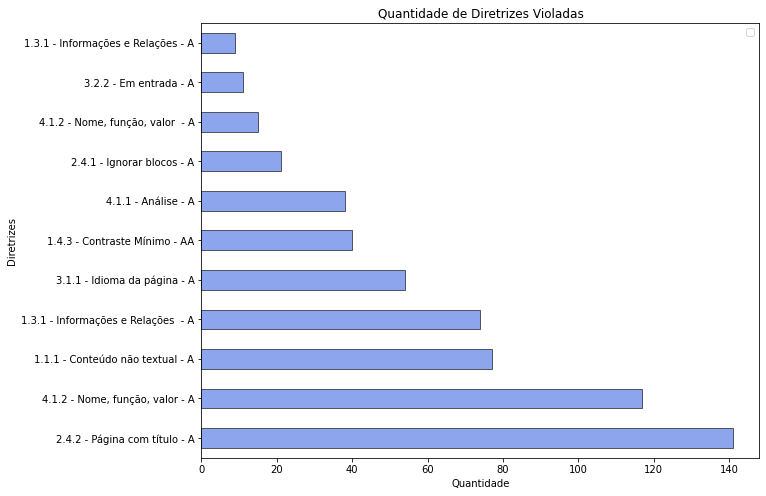

In [19]:
import matplotlib as plot
import matplotlib.pyplot as plt

##CALCULA SAÍDA DE VIOLAÇÕES DE DIRETRIZES

data_count.plot.barh(x='code', ec = "k", alpha = .6, color = "royalblue", figsize = (10, 8))
plt.title("Quantidade de Diretrizes Violadas")
plt.xlabel("Quantidade")
plt.ylabel("Diretrizes")
plt.legend('')

40


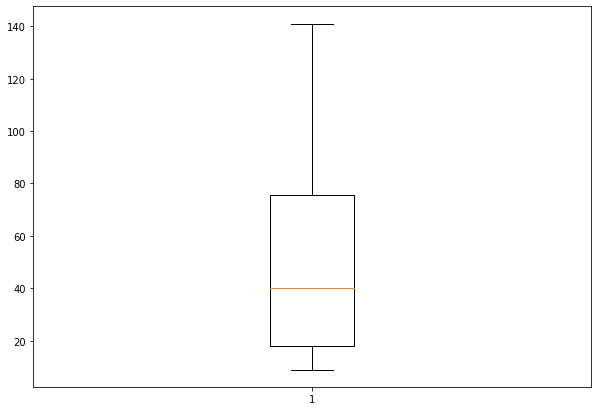

In [20]:
import statistics

###CALCULA MEDIANA DE VIOLAÇÕES POR QUARTIL 

databx = [141, 117, 77, 74, 54, 40, 38, 21, 15, 11, 9]
fig = plt.figure(figsize =(10, 7)) 
print (statistics.median(databx))
plt.boxplot(databx)
plt.show()

In [25]:
###AGRUPAMENTO POR PRINCÍPIOS

dataPrinciples_count = (
    data
    .groupby('Princípio')
    .size()
    .reset_index(name='count')
    .sort_values(by=['count'], ascending=False)
)
dataPrinciples_count

,Princípio,count
2,Perceptível,198
3,Robustez,170
1,Operável,164
0,Compreensível,65


In [28]:
import statistics as st

##MEDIA DE VIOLAÇÕES DE PRINCÍPIOS POR SNIPPET

data_media = [198, 170, 164, 65]
st.mean(data_media)

149.25

In [71]:
###CALCULAR PORCENTAGEM DE PPRINCIPIOS

principiosList = ['Perceptível', 'Robustez', 'Operável', 'Compreensível']
for i in range(len(principiosList)):
    resultadosPrincipios = [198, 170, 164, 65]
    for j in range(len(resultadosPrincipios)):
        totalViolacoes = 597            ##Mudar total de violações caso altere resultado
        resultadosPrincipios[j] = (resultadosPrincipios[j]/totalViolacoes)*100 
    print("", principiosList[i], ": {:.2f}".format(resultadosPrincipios[i]), "%")

 Perceptível : 33.17 %
 Robustez : 28.48 %
 Operável : 27.47 %
 Compreensível : 10.89 %


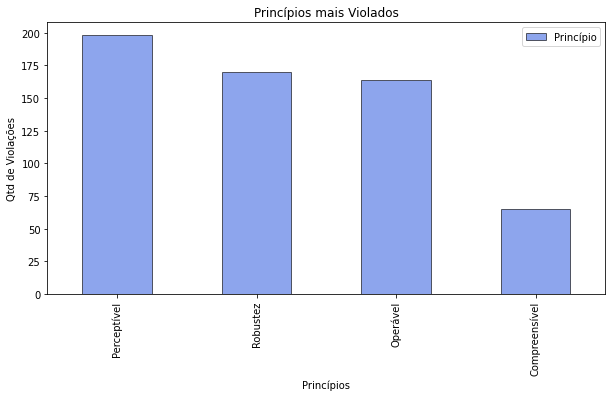

In [84]:
import matplotlib as plot
import matplotlib.pyplot as plt

###PLOTAR RESULTADOS POR PRINCÍPIOS

dataPrinciples_count.plot.bar(x='Princípio', ec='k',alpha = .6, color = "royalblue", figsize=(10,5))
plt.title("Princípios mais Violados")
plt.xlabel("Princípios")
plt.ylabel("Qtd de Violações")
plt.legend(dataPrinciples_count)

In [12]:
total_snippet = 206
